In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [152]:
df = pd.read_csv('ElectricCarData_Norm.csv')
df

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [154]:
df.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

In [155]:
df.describe()

,Seats,PriceEuro
count,103.000000,103.000000
mean,4.883495,55811.563107
std,0.795834,34134.665280
min,2.000000,20129.000000
25%,5.000000,34429.500000
50%,5.000000,45000.000000
75%,5.000000,65000.000000
max,7.000000,215000.000000


In [156]:
accel = []

for i in df.Accel:
    a = str.split(i)
    accel.append(a[0])
    
print(accel)    

['4.6', '10.0', '4.7', '6.8', '9.5', '2.8', '9.6', '8.1', '5.6', '6.3', '5.1', '7.9', '7.9', '4.0', '9.7', '7.9', '2.8', '11.9', '8.2', '7.3', '8.1', '5.1', '10.0', '3.5', '3.4', '7.5', '9.0', '4.9', '7.3', '8.5', '6.8', '7.8', '11.4', '3.0', '9.0', '7.3', '7.5', '6.5', '9.5', '5.0', '3.8', '9.9', '5.7', '12.3', '12.3', '7.9', '7.3', '4.0', '10.0', '9.0', '5.7', '2.1', '8.5', '8.8', '4.6', '8.3', '8.7', '12.6', '9.7', '2.5', '11.4', '3.7', '7.6', '4.8', '7.0', '4.0', '14.0', '5.0', '22.4', '6.0', '6.9', '7.0', '3.5', '5.5', '9.0', '9.8', '6.3', '12.7', '6.0', '3.2', '7.3', '2.8', '11.6', '6.6', '10.0', '9.0', '7.0', '6.8', '6.2', '9.0', '4.5', '11.9', '7.9', '5.7', '9.0', '7.3', '9.9', '7.5', '7.5', '4.5', '5.9', '5.1', '7.5']


In [157]:
df['Accel'] = pd.Series(accel)
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [158]:
df.drop('accel',axis=1,inplace=True)
df.head()

KeyError: "['accel'] not found in axis"

In [ ]:
z = []
for i in df.TopSpeed:
    a = str.split(i)
    z.append(a[0])
print(z)    

In [ ]:
df['TopSpeed'] = pd.Series(z)
df.head()

In [ ]:
z = []
for i in df.Range:
    a = str.split(i)
    z.append(a[0])
print(z)    

In [ ]:
df['Range'] = pd.Series(z)
df.head()

In [ ]:
z = []
for i in df.Efficiency:
    a = str.split(i)
    z.append(a[0])
print(z)

df['Efficiency'] = pd.Series(z)
df.head()

In [ ]:
z = []
for i in df.FastCharge:
    a = str.split(i)
    z.append(a[0])
print(z)

df['FastCharge'] = pd.Series(z)
df.head()

### Brandwise EV models

<Figure size 800x800 with 0 Axes>

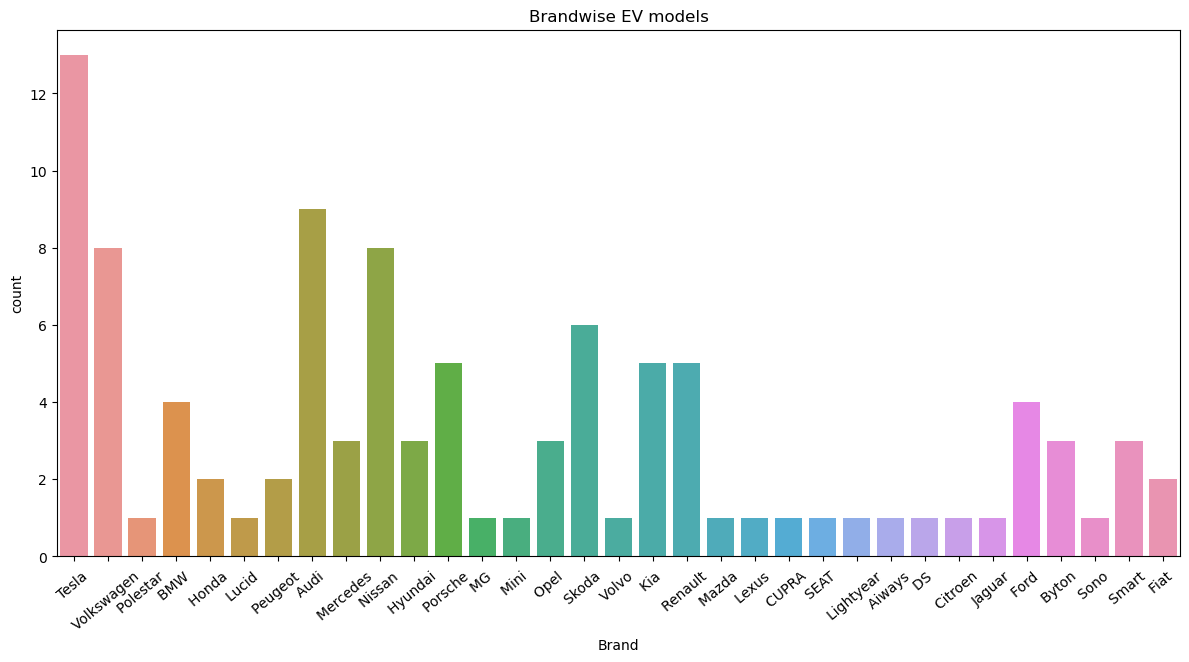

In [159]:
plt.figure(figsize=(8,8))

sns.catplot(data=df,x='Brand',kind='count',height=6,aspect=2)
sns.despine(right=False,top=False)
plt.tick_params(axis='x',rotation=40)
plt.title('Brandwise EV models')

plt.savefig('10.png')

### Different Body styles of EV

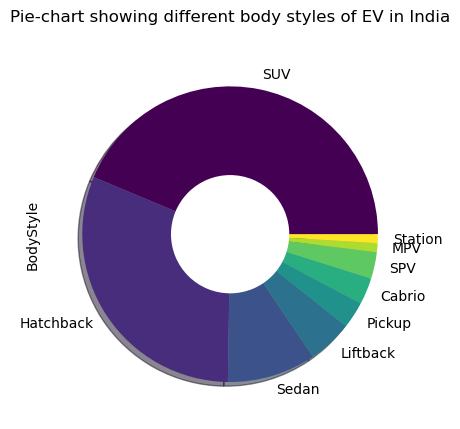

In [164]:
x = df.BodyStyle.value_counts().plot.pie(radius=1,cmap='viridis',shadow=True)
plt.pie(x=[1],radius=0.4,colors='white')

plt.title('Pie-chart showing different body styles of EV in India',pad=20)

plt.savefig('11.png')

### Segments of EV in India

Text(0.5, 1.0, 'Segment-wise variation of EVs in India')

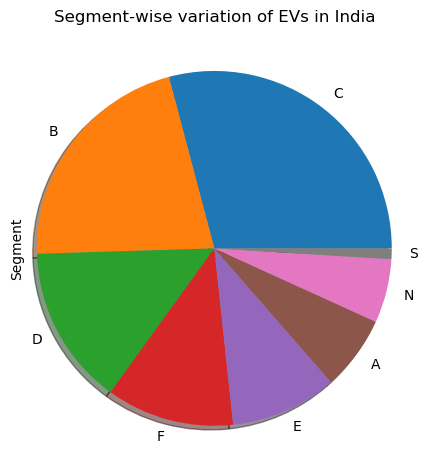

In [166]:
df.Segment.value_counts().plot.pie(shadow=True,radius=1.2)
plt.title('Segment-wise variation of EVs in India',pad=30)

Text(0.5, 1.0, 'Available seats in EVs in India')

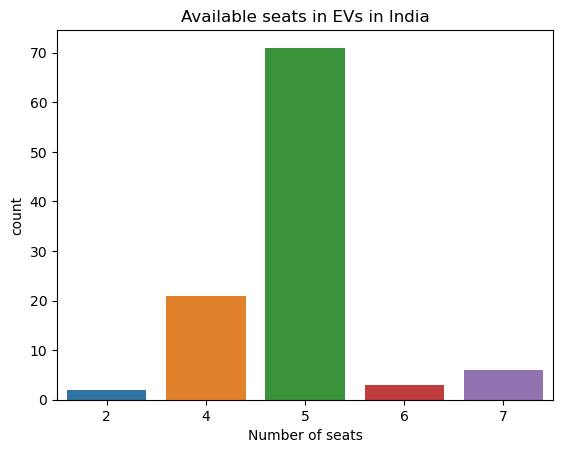

In [72]:
sns.countplot(data=df,x='Seats')

plt.xlabel('Number of seats')
plt.title('Available seats in EVs in India')

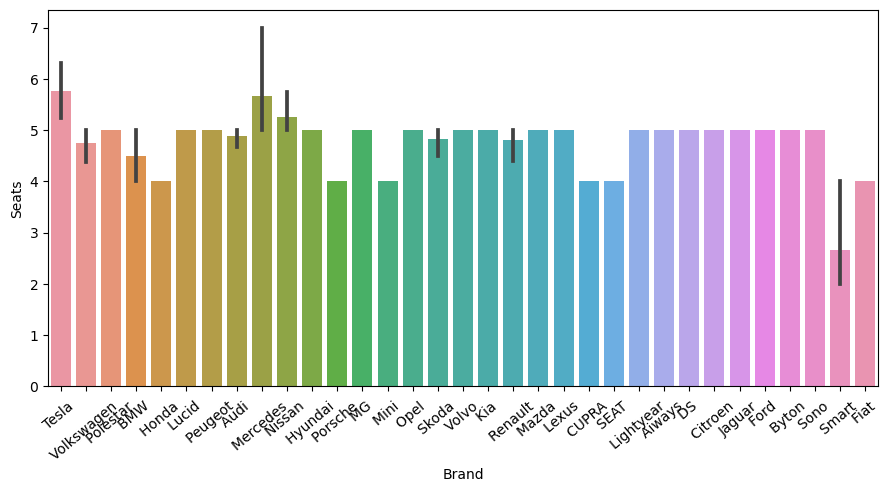

In [172]:
sns.catplot(data=df,x='Brand',y='Seats',kind='bar',height=4.5,aspect=2)
sns.despine(right=False,top=False)
plt.tick_params(axis='x',rotation=40)

### Analysis of different plug-types

Text(0.5, 1.0, 'Different plug-type variations in EVs in India')

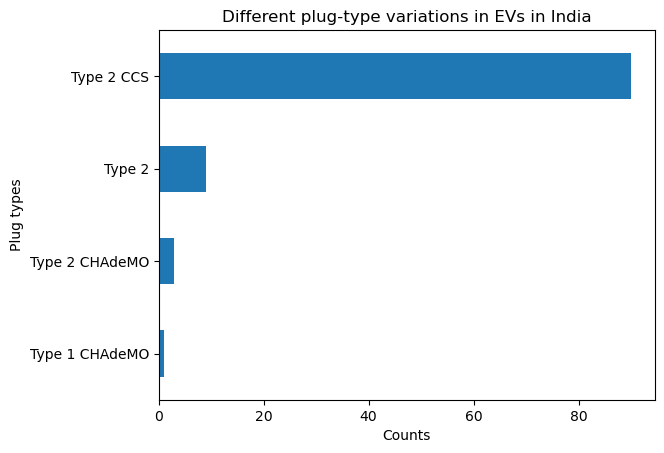

In [89]:
df.PlugType.value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Counts')
plt.ylabel('Plug types')
plt.title('Different plug-type variations in EVs in India')

Text(0.5, 1.0, 'Price variation as per sample numbers')

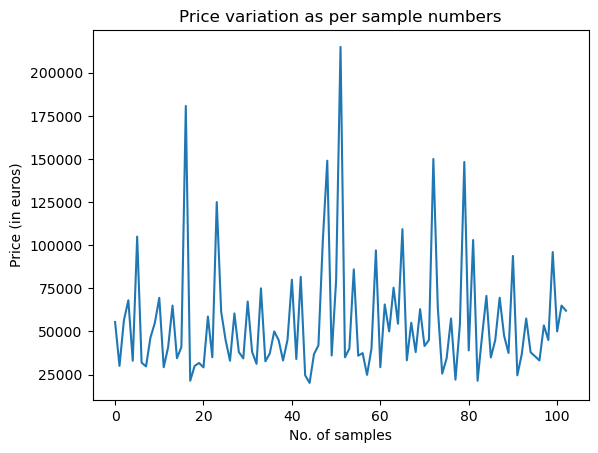

In [91]:
plt.plot(df.PriceEuro)
plt.xlabel('No. of samples')
plt.ylabel('Price (in euros)')
plt.title('Price variation as per sample numbers')

In [102]:
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [101]:
df['Accel'] = df['Accel'].astype(float)
df.dtypes

Brand           object
Model           object
Accel          float64
TopSpeed        object
Range           object
Efficiency      object
FastCharge      object
RapidCharge     object
PowerTrain      object
PlugType        object
BodyStyle       object
Segment         object
Seats            int64
PriceEuro        int64
dtype: object

In [103]:
df['TopSpeed'] = df['TopSpeed'].astype(float)
df.dtypes

Brand           object
Model           object
Accel          float64
TopSpeed       float64
Range           object
Efficiency      object
FastCharge      object
RapidCharge     object
PowerTrain      object
PlugType        object
BodyStyle       object
Segment         object
Seats            int64
PriceEuro        int64
dtype: object

In [104]:
df['Range'] = df['Range'].astype(int)
df.dtypes

Brand           object
Model           object
Accel          float64
TopSpeed       float64
Range            int32
Efficiency      object
FastCharge      object
RapidCharge     object
PowerTrain      object
PlugType        object
BodyStyle       object
Segment         object
Seats            int64
PriceEuro        int64
dtype: object

In [105]:
df['Efficiency'] = df['Efficiency'].astype(int)
df.dtypes

Brand           object
Model           object
Accel          float64
TopSpeed       float64
Range            int32
Efficiency       int32
FastCharge      object
RapidCharge     object
PowerTrain      object
PlugType        object
BodyStyle       object
Segment         object
Seats            int64
PriceEuro        int64
dtype: object

In [107]:
df.FastCharge.unique()

array(['940', '250', '620', '560', '190', '220', '420', '650', '540',
       '440', '230', '380', '210', '590', '780', '170', '260', '930',
       '850', '910', '490', '470', '270', '450', '350', '710', '240',
       '390', '570', '610', '340', '730', '920', '-', '550', '900', '520',
       '430', '890', '410', '770', '460', '360', '810', '480', '290',
       '330', '740', '510', '320', '500'], dtype=object)

In [108]:
df[df.FastCharge=='-']

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
57,Renault,Twingo ZE,12.6,135.0,130,164,-,Rapid charging not possible,Rear Wheel Drive,Type 2,Hatchback,A,4,24790
68,Renault,Kangoo Maxi ZE 33,22.4,130.0,160,194,-,Rapid charging not possible,Front Wheel Drive,Type 2,SPV,N,5,38000
77,Smart,EQ forfour,12.7,130.0,95,176,-,Rapid charging not possible,Rear Wheel Drive,Type 2,Hatchback,A,4,22030
82,Smart,EQ fortwo coupe,11.6,130.0,100,167,-,Rapid charging not possible,Rear Wheel Drive,Type 2,Hatchback,A,2,21387
91,Smart,EQ fortwo cabrio,11.9,130.0,95,176,-,Rapid charging not possible,Rear Wheel Drive,Type 2,Cabrio,A,2,24565


In [110]:
z = []

for i in df.FastCharge:
    if i=='-':
        z.append('0')
    else:
        z.append(i)
        
print(z)       

['940', '250', '620', '560', '190', '620', '220', '420', '650', '540', '440', '230', '380', '650', '210', '590', '780', '170', '260', '260', '420', '930', '230', '850', '910', '560', '490', '470', '270', '380', '450', '350', '230', '710', '240', '390', '190', '570', '230', '440', '560', '210', '610', '170', '170', '340', '210', '730', '540', '350', '590', '920', '390', '560', '490', '190', '380', '0', '380', '550', '230', '900', '520', '340', '430', '890', '190', '710', '0', '410', '260', '540', '770', '460', '270', '230', '550', '0', '360', '810', '470', '480', '0', '380', '290', '330', '740', '470', '540', '440', '510', '0', '320', '500', '330', '470', '220', '420', '440', '540', '440', '450', '480']


In [111]:
df['FastCharge'] = pd.Series(z)
df.FastCharge.unique()

array(['940', '250', '620', '560', '190', '220', '420', '650', '540',
       '440', '230', '380', '210', '590', '780', '170', '260', '930',
       '850', '910', '490', '470', '270', '450', '350', '710', '240',
       '390', '570', '610', '340', '730', '920', '0', '550', '900', '520',
       '430', '890', '410', '770', '460', '360', '810', '480', '290',
       '330', '740', '510', '320', '500'], dtype=object)

In [112]:
df['FastCharge'] = df['FastCharge'].astype(int)
df.dtypes

Brand           object
Model           object
Accel          float64
TopSpeed       float64
Range            int32
Efficiency       int32
FastCharge       int32
RapidCharge     object
PowerTrain      object
PlugType        object
BodyStyle       object
Segment         object
Seats            int64
PriceEuro        int64
dtype: object

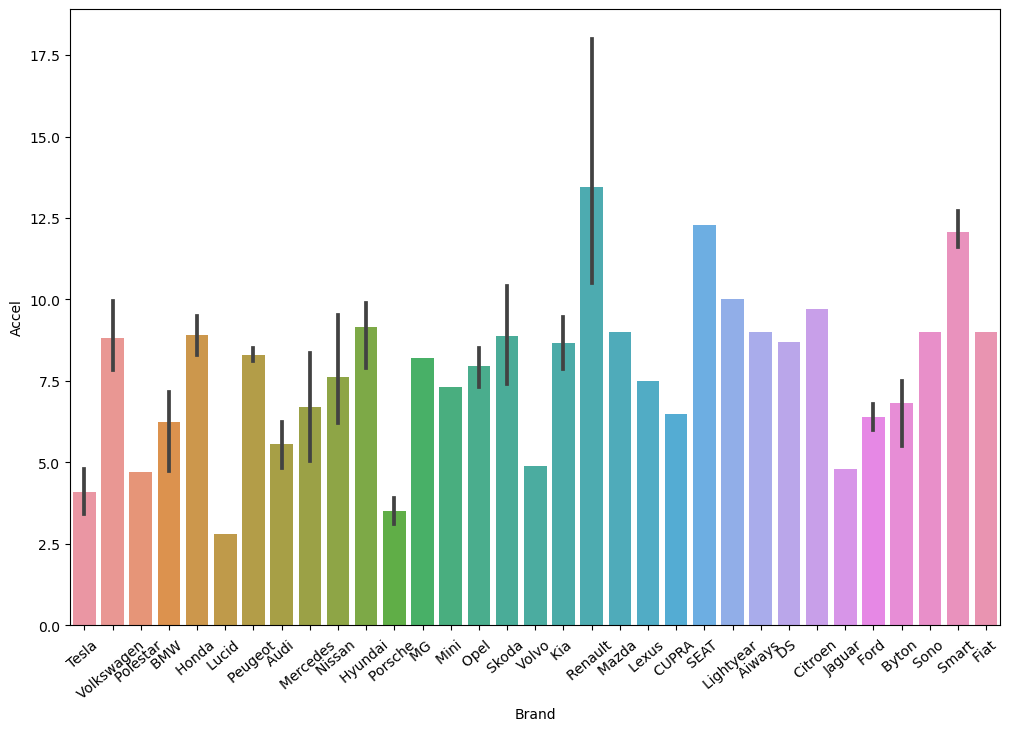

In [124]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x='Brand',y='Accel')
plt.tick_params(axis='x',rotation=40)

In [125]:
df.corr()

C:\Users\Argha009\AppData\Local\Temp\ipykernel_2288\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Accel,TopSpeed,Range,Efficiency,FastCharge,Seats,PriceEuro
Accel,1.000000,-0.786195,-0.677062,-0.382904,-0.782324,-0.175335,-0.627174
TopSpeed,-0.786195,1.000000,0.746662,0.355675,0.778422,0.126470,0.829057
Range,-0.677062,0.746662,1.000000,0.313077,0.750859,0.300163,0.674844
Efficiency,-0.382904,0.355675,0.313077,1.000000,0.319678,0.301230,0.396705
FastCharge,-0.782324,0.778422,0.750859,0.319678,1.000000,0.262732,0.658882
Seats,-0.175335,0.126470,0.300163,0.301230,0.262732,1.000000,0.020920
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.658882,0.020920,1.000000


C:\Users\Argha009\AppData\Local\Temp\ipykernel_2288\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

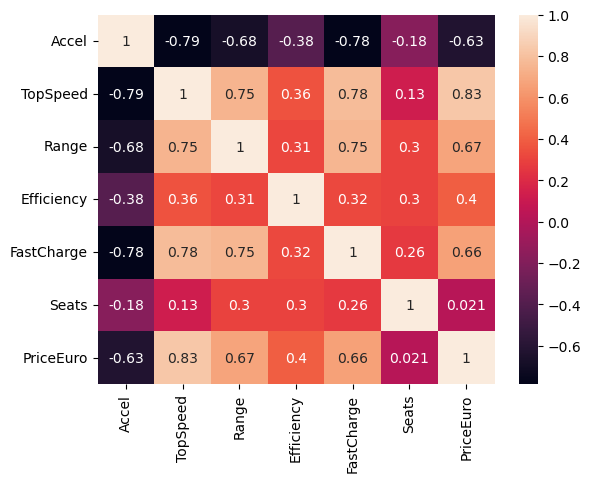

In [127]:
sns.heatmap(df.corr(),annot=True)

### Encoding the categorical features

In [128]:
df.dtypes

Brand           object
Model           object
Accel          float64
TopSpeed       float64
Range            int32
Efficiency       int32
FastCharge       int32
RapidCharge     object
PowerTrain      object
PlugType        object
BodyStyle       object
Segment         object
Seats            int64
PriceEuro        int64
dtype: object

In [134]:
df.RapidCharge.unique()

array(['Rapid charging possible', 'Rapid charging not possible'],
      dtype=object)

In [135]:
df.PowerTrain.unique()

array(['All Wheel Drive', 'Rear Wheel Drive', 'Front Wheel Drive'],
      dtype=object)

In [136]:
df['PowerTrain'].replace(to_replace=['Rear Wheel Drive','Front Wheel Drive','All Wheel Drive'],value=[0, 1, 2],inplace=True)
df['RapidCharge'].replace(to_replace=['Rapid charging not possible','Rapid charging possible'],value=[0, 1],inplace=True)

### Feature selection

In [137]:
X = df[['Accel','TopSpeed','Efficiency','FastCharge','Range','RapidCharge','Seats','PriceEuro','PowerTrain']]

In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### PCA

In [140]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)


df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.327343,0.251058,-1.285910,-0.589550,0.741695,-1.336093,0.333731,-0.793532,-0.359102
1,-1.917169,-0.570523,-0.703815,0.599540,0.204536,0.345406,-0.399780,0.248018,-0.324925
2,1.528789,0.025753,-0.380455,-0.682523,0.108181,-0.727058,0.280288,0.031797,-0.086851
3,0.259288,-0.100156,-0.252992,1.609250,-0.149788,0.178422,-0.433796,-0.289689,0.186040
4,-2.566457,0.257976,-0.791391,0.322834,-0.899487,0.341113,-0.502423,0.126064,-0.165389


# Elbow curve plotting

In [141]:
from sklearn.cluster import KMeans

In [142]:
wcss = []

for i in range(1,11):
    k_mean = KMeans(n_clusters=i,random_state=90,init='k-means++')
    k_mean.fit(X_pca)
    wcss.append(k_mean.inertia_)
    
print(wcss)    

C:\Users\Argha009\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Argha009\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Argha009\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Argha009\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

[926.9999999999999, 590.4364350346735, 437.64138323982223, 354.3100552428119, 309.69593084503146, 268.3957972901541, 235.95078705741528, 212.7186839257608, 196.70768160242028, 174.09808905769668]


Text(0.5, 1.0, 'Elbow plot')

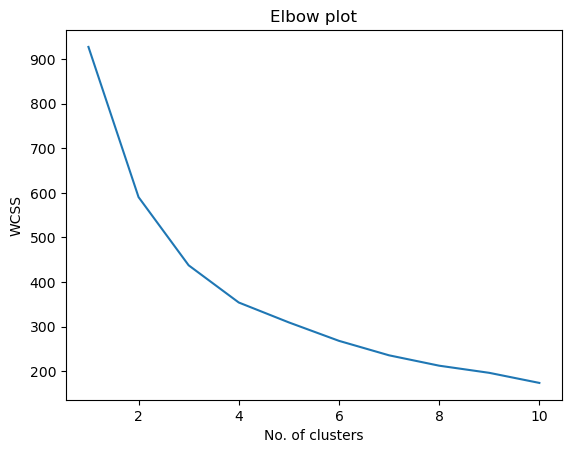

In [145]:
plt.plot(range(1,11),wcss)
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.title('Elbow plot')

In [147]:
# Training the model using n_clusters = 4

k_mean = KMeans(n_clusters=4,random_state=90,init='k-means++')
k_mean.fit(X_pca)

C:\Users\Argha009\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Argha009\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [148]:
k_mean.labels_

array([3, 0, 1, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1,
       0, 3, 3, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 1, 0,
       0, 0, 0, 3, 3, 0, 1, 3, 0, 0, 1, 0, 0, 2, 0, 3, 0, 1, 0, 1, 0, 3,
       0, 1, 2, 1, 0, 1, 3, 1, 0, 0, 1, 2, 1, 3, 0, 1, 2, 0, 1, 0, 1, 1,
       1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [149]:
# Checking the size of the clusters

pd.Series(k_mean.labels_).value_counts()

0    55
1    30
3    13
2     5
dtype: int64

In [150]:
df['Clusters'] = k_mean.labels_
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Clusters
0,Tesla,Model 3 Long Range Dual Motor,4.6,233.0,450,161,940,1,2,Type 2 CCS,Sedan,D,5,55480,3
1,Volkswagen,ID.3 Pure,10.0,160.0,270,167,250,1,0,Type 2 CCS,Hatchback,C,5,30000,0
2,Polestar,2,4.7,210.0,400,181,620,1,2,Type 2 CCS,Liftback,D,5,56440,1
3,BMW,iX3,6.8,180.0,360,206,560,1,0,Type 2 CCS,SUV,D,5,68040,0
4,Honda,e,9.5,145.0,170,168,190,1,0,Type 2 CCS,Hatchback,B,4,32997,0
